# El imparcial

In [1]:
import json
import numpy as np
import shutil
import glob
from tqdm import tqdm
import pandas as pd
import unidecode
import os
import subprocess
import  tarfile
import xml.etree.ElementTree as ET
import ast
import zipfile
import datetime

In [2]:
txt_files = glob.glob('/scratch/students/antoun/corpus/Spain/**/*.txt', recursive=True)

# Count the number of files, which represents the number of articles
num_articles = len(txt_files)

print("Total number of articles:", num_articles)

Total number of articles: 23008


In [3]:
os.makedirs('/scratch/students/antoun/el_imparcial/filtered_futur', exist_ok=True)

In [4]:
text_count = 0
filter_count = 0
for root, dirs, files in os.walk('/scratch/students/antoun/corpus/Spain'):
    for file_name in files:
        if file_name.endswith('.txt'):
            with open(os.path.join(root, file_name), 'r') as text_file:
                text = text_file.read()
                text_count += 1
        
                # Check if "futur" is in file
                if 'futur' in text.lower():
                    # Copy file to filtered file directory
                    shutil.copyfile(os.path.join(root, file_name), os.path.join('/scratch/students/antoun/el_imparcial/filtered_futur', file_name))
                    filter_count += 1
            
print(f"Found {text_count} articles")
print(f"Found {filter_count} articles containing the word future in spanish")



Found 23008 articles
Found 11776 articles containing the word future in spanish


In [5]:
if not os.path.exists("/scratch/students/antoun/el_imparcial/data"):
    os.makedirs("/scratch/students/antoun/el_imparcial/data")

# Get list of all articles
every_article = glob.glob('/scratch/students/antoun/el_imparcial/filtered_futur/*.txt')
futur_articles = pd.DataFrame(columns=["publication_date", "content"])
dates_sp = set()

for article in tqdm(every_article):
    filename = os.path.basename(article)
    date = filename[:13]
    try:
        date = datetime.datetime.strptime(date, '%Y%m%d_%H%M')
    except ValueError:
        print("Invalid date format for file:", filename)
        continue
    dates_sp.add(date)
    with open(article, 'r') as f:
        content = f.read()
        futur_articles.loc[date] = {"publication_date": date, "content": content}

# sort data by publication date
futur_articles.sort_values(by=["publication_date"], inplace=True)

# save the data to CSV file
futur_articles.to_csv("/scratch/students/antoun/el_imparcial/spanish_articles.csv", index = False)

# save dates to a file
with open('/scratch/students/antoun/el_imparcial/data/dates_sp.txt', 'w') as f:
    # parse dates as datetime objects and sort them
    dates_sp_sorted = sorted(dates_sp)
    # convert datetime objects back to strings in the desired format and write them to file
    f.write('\n'.join([date.strftime('%Y%m%d_%H%M') for date in dates_sp_sorted]))


100%|███████████████████████████████████████| 11776/11776 [00:30<00:00, 389.40it/s]


## raw frequency of "futur"

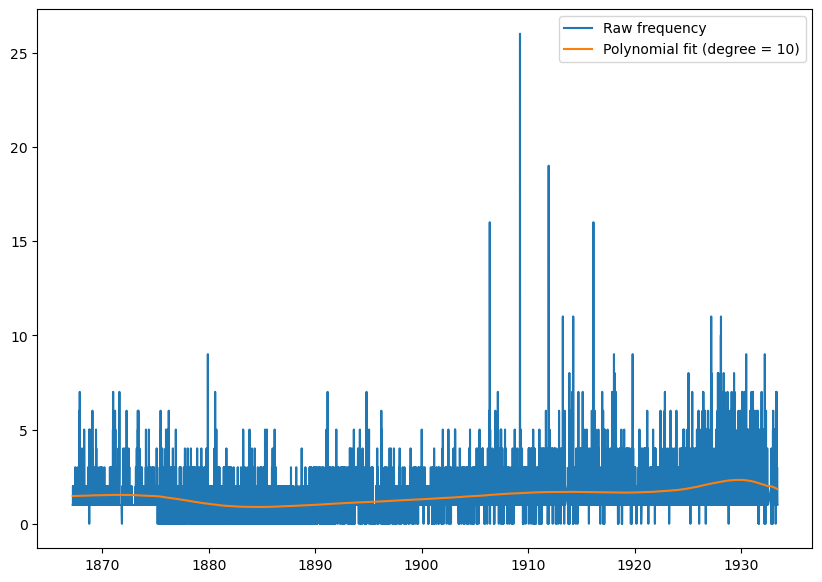

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

df = pd.read_csv("/scratch/students/antoun/el_imparcial/spanish_articles.csv")
df = df.sort_values(by = "publication_date")

#convert column "piblication_date" from string to date time format
df["publication_date"] = pd.to_datetime(df["publication_date"], format = "%Y-%m-%d").dt.date

#set index to piblication date column
df = df.set_index("publication_date")
x = np.arange(len(df))

#function that counts raw frequency
def count_word_frequency(word, text):
    return text.count(word)

word = "futur"
df["frequency"] = df["content"].apply(lambda x: count_word_frequency(word, x))



y = df["frequency"]
degree = 10
coeffs = np.polyfit(x, y, degree)
frequencies_polyfit = np.polyval(coeffs, x)

#plot
plt.figure(figsize=(10,7))
plt.plot(df.index, df["frequency"], label = "Raw frequency")
plt.plot(df.index, frequencies_polyfit, label = f"Polynomial fit (degree = {degree})")
plt.legend()
plt.show()

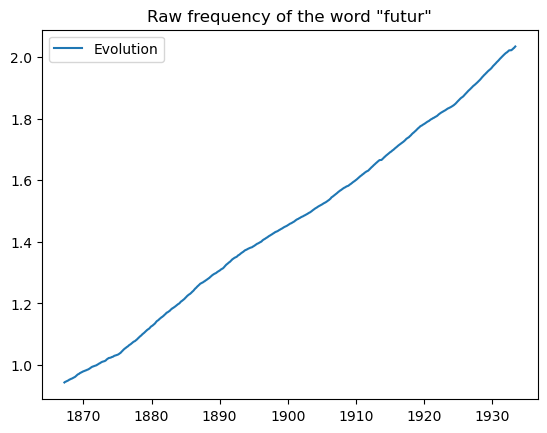

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
x = np.arange(len(df)).reshape(-1, 1)
y = df['frequency'].values.reshape(-1, 1)
model.fit(x, y)

plt.plot(df.index, model.predict(x), label = "Evolution")
plt.title('Raw frequency of the word "futur"')
plt.legend()
plt.show()

## raw frequency of "futuro"

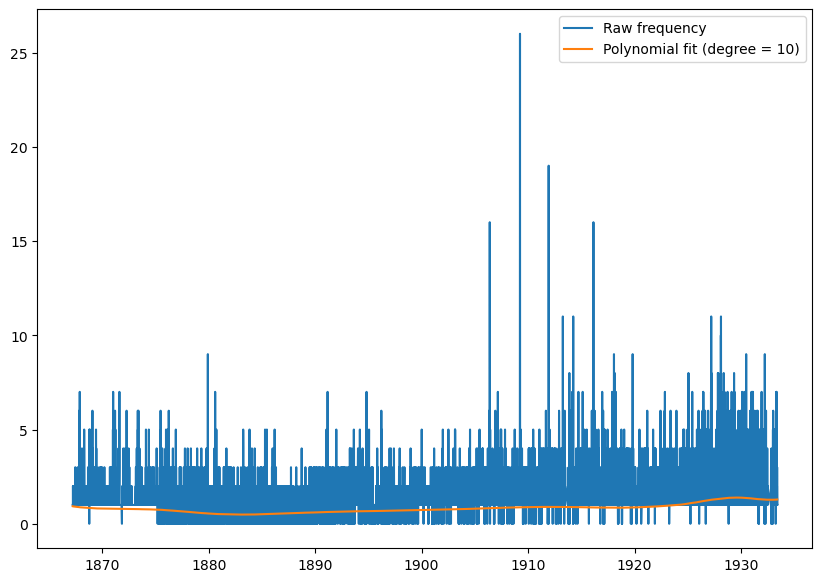

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

df2 = pd.read_csv("/scratch/students/antoun/el_imparcial/spanish_articles.csv")
df2 = df2.sort_values(by = "publication_date")

#convert column "piblication_date" from string to date time format
df2["publication_date"] = pd.to_datetime(df2["publication_date"], format = "%Y-%m-%d").dt.date

#set index to piblication date column
df2 = df2.set_index("publication_date")
x = np.arange(len(df))

#function that counts raw frequency
def count_word_frequency(word, text):
    return text.count(word)

word = "futuro"
df2["frequency"] = df2["content"].apply(lambda x: count_word_frequency(word, x))



y = df2["frequency"]
degree = 10
coeffs = np.polyfit(x, y, degree)
frequencies_polyfit = np.polyval(coeffs, x)

#plot
plt.figure(figsize=(10,7))
plt.plot(df.index, df["frequency"], label = "Raw frequency")
plt.plot(df.index, frequencies_polyfit, label = f"Polynomial fit (degree = {degree})")
plt.legend()
plt.show()

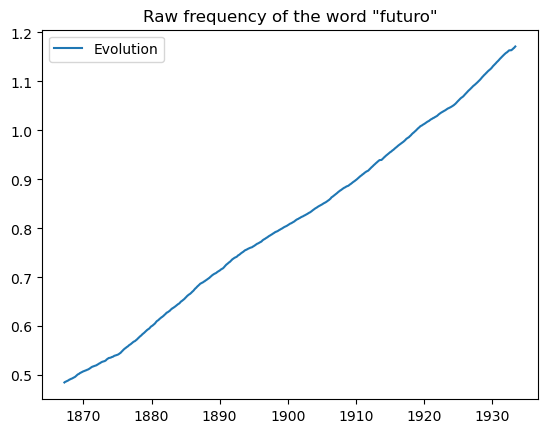

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
x = np.arange(len(df)).reshape(-1, 1)
y = df2['frequency'].values.reshape(-1, 1)
model.fit(x, y)

plt.plot(df2.index, model.predict(x), label = "Evolution")
plt.title('Raw frequency of the word "futuro"')
plt.legend()
plt.show()

## Raw frequency of "futura"

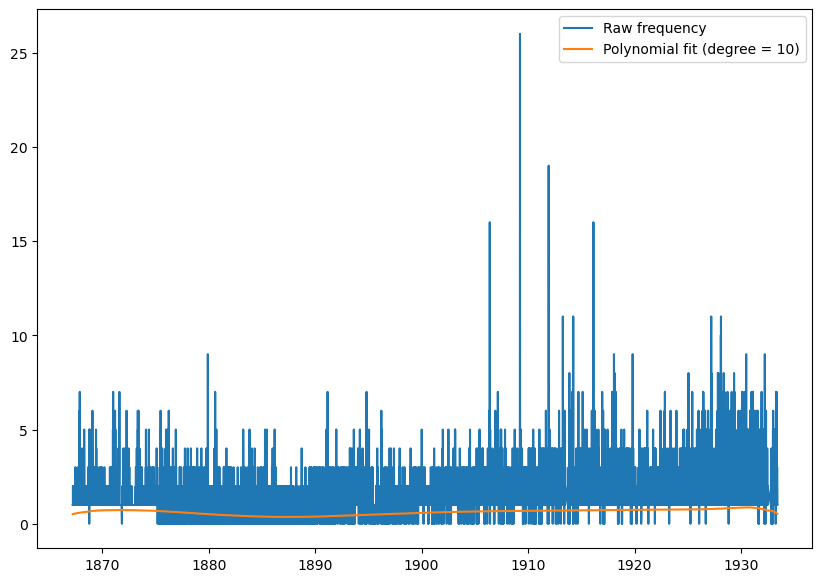

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

df3 = pd.read_csv("/scratch/students/antoun/el_imparcial/spanish_articles.csv")
df3 = df3.sort_values(by = "publication_date")

#convert column "piblication_date" from string to date time format
df3["publication_date"] = pd.to_datetime(df3["publication_date"], format = "%Y-%m-%d").dt.date

#set index to piblication date column
df3 = df3.set_index("publication_date")
x = np.arange(len(df))

#function that counts raw frequency
def count_word_frequency(word, text):
    return text.count(word)

word = "futura"
df3["frequency"] = df3["content"].apply(lambda x: count_word_frequency(word, x))



y = df3["frequency"]
degree = 10
coeffs = np.polyfit(x, y, degree)
frequencies_polyfit = np.polyval(coeffs, x)

#plot
plt.figure(figsize=(10,7))
plt.plot(df.index, df["frequency"], label = "Raw frequency")
plt.plot(df.index, frequencies_polyfit, label = f"Polynomial fit (degree = {degree})")
plt.legend()
plt.show()

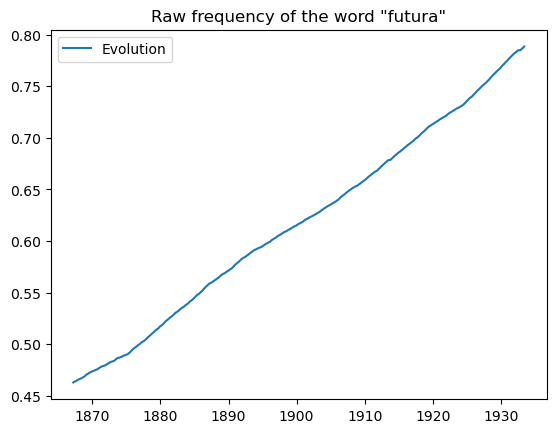

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
x = np.arange(len(df)).reshape(-1, 1)
y = df3['frequency'].values.reshape(-1, 1)
model.fit(x, y)

plt.plot(df3.index, model.predict(x), label = "Evolution")
plt.title('Raw frequency of the word "futura"')
plt.legend()
plt.show()

## key word in context of future


In [2]:
import nltk 
nltk.download('punkt')
from nltk import ngrams
from nltk.text import Text
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

[nltk_data] Downloading package punkt to /home/tamantoun/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# Load the CSV file into a pandas data frame
pd.options.mode.chained_assignment = None  # default='warn'
df = pd.read_csv("/scratch/students/antoun/el_imparcial/spanish_articles.csv")

df['publication_date'] = pd.to_datetime(df['publication_date'], format='%Y-%m-%d').dt.date

range1 = (datetime.datetime.strptime('18670101.m', '%Y%m%d.m').date(),
          datetime.datetime.strptime('19000101.m', '%Y%m%d.m').date())

range2 = (datetime.datetime.strptime('19000101.m', '%Y%m%d.m').date(),
          datetime.datetime.strptime('19330530.m', '%Y%m%d.m').date())


# Open the file and read the dates
with open('/scratch/students/antoun/el_imparcial/data/dates_sp.txt', 'r') as f:
    dates = f.read().splitlines()

# Convert the dates to date objects
dates = [datetime.datetime.strptime(date, '%Y%m%d_%H%M').date() for date in dates]

block1 = df.loc[df["publication_date"].isin(dates) & (df["publication_date"] >= range1[0]) & (df["publication_date"] <= range1[1])]
new_value1 = block1["content"].apply(nltk.word_tokenize) 
block1["tokens"] = new_value1

block2 = df.loc[df["publication_date"].isin(dates) & (df["publication_date"] >= range2[0]) & (df["publication_date"] <= range2[1])]
new_value2 = block2["content"].apply(nltk.word_tokenize) 
block2["tokens"] = new_value2

# Print the number of dates in each block
print(f"Block1  ({range1[0]} - {range1[1]}): {len(block1)} dates")
print(f"Block2  ({range2[0]} - {range2[1]}): {len(block2)} dates")


Block1  (1867-01-01 - 1900-01-01): 5511 dates
Block2  (1900-01-01 - 1933-05-30): 6265 dates


In [4]:
from nltk.text import Text

# Create a list of token strings for each block
block1_tokens = [token for doc in block1["tokens"] for token in doc]
block2_tokens = [token for doc in block2["tokens"] for token in doc]


# Create a Text object for each block
text_block1 = Text(block1_tokens)
text_block2 = Text(block2_tokens)


with open("/scratch/students/antoun/el_imparcial/key-word-in-context-futur.txt ", "w") as file :
    file.write("----------------------BLOCK1-------------------------- \n")
    for line in text_block1.concordance_list("futuro", lines=22):
        file.write(line.line + "\n")
    file.write("----------------------BLOCK2-------------------------- \n")
    for line in text_block2.concordance_list("futuro", lines=22):
        file.write(line.line + "\n")
    

# Perform a concordance analysis for the word "futur" in each block
print("Concordance analysis for 'futuro' in Block1:")
text_block1.concordance("futuro")
print("Concordance analysis for 'futuro' in Block2:")
text_block2.concordance("futuro")


Concordance analysis for 'futuro' in Block1:
Displaying 25 of 5277 matches:
edio de caminos do . _ cusiones del futuro parlamento ; » en lo cual estriba q
eder en las próximas disensiones cM futuro cienda pública están completamente 
eturas acerca de la composición del futuro Congreso , del número y c a h d a d
 reconoceu . Sí dentro del Congreso futuro hubiese , Á nuestros ojos , otra pe
 ; tados de la presunta mayoría del futuro Congreso . INTERIOU . SECCIÓN ! » E
os ni consejeros interesados que su futuro sucesor , habéis sido invencibles y
ara disimular bien el esqueleto del futuro santo curó el cuerpo , no parece pr
discurso que traza la senda para lo futuro . Y si esto se verifica con » absol
: el padre dé la novia entregaba al futuro yerno un mazo de varas , unos dicen
ger lo bueno y lo á yi'^ir , con el futuro príncipe de R . . . á una posesión 
u hermana . Poco i m p o r t a : lo futuro —¿Qué me quieres ? será lo que de s
 canto bretón : , Poco importa : lo futuro ' ' será lo 

In [ ]:
import pandas as pd
from nltk import FreqDist

# Create a list of two-grams in the tokenized text for block 1
two_grams_block_1_before = []
two_grams_block_1_after = []



for doc in block1["tokens"]:
    for i in range(len(doc)):
        if doc[i] == ("futuro"):
            if i > 1:
                two_grams_block_1_before.append((doc[i-2], doc[i-1]))
            if i < len(doc)-3:
                two_grams_block_1_after.append((doc[i+1], doc[i+2]))



# Compute the frequency distribution of the tri-grams for block 1
freq_dist_block_1_before = FreqDist(two_grams_block_1_before)
freq_dist_block_1_after = FreqDist(two_grams_block_1_after)

with open("/scratch/students/antoun/el_imparcial/two-grams-output-futur_spain1.txt", "a") as file:
    # Write the two-grams before "futur"
    file.write("-------------------------BLOCK_1-----------------------Two-grams before 'futur':\n")
    for two_gram in two_grams_block_1_before:
        file.write(f"{two_gram[0]} {two_gram[1]}\n")
    # Write the two-grams after "futur"
    file.write("-------------------------BLOCK_1-----------------------Two-grams after 'futur':\n")
    for two_gram in two_grams_block_1_after:
        file.write(f"{two_gram[0]} {two_gram[1]}\n")


# Print all occurrences of the tri-gram "futuro" in block of tokenized text
print("Block 1 (1867-1900): \n")
print(f"2-grams before 'futuro': \n")
print(two_grams_block_1_before, "\n")
print(f"2-grams after 'futuro': \n")
print(two_grams_block_1_after, "\n")
print("Most common 2-grams before: \n")
print(freq_dist_block_1_before.most_common(), "\n")
print("Most common 2-grams after: \n")
print(freq_dist_block_1_after.most_common())

In [ ]:
import pandas as pd
from nltk import FreqDist

# Create a list of two-grams in the tokenized text for block 2
two_grams_block_2_before = []
two_grams_block_2_after = []



for doc in block2["tokens"]:
    for i in range(len(doc)):
        if doc[i] == ("futuro"):
            if i > 1:
                two_grams_block_2_before.append((doc[i-2], doc[i-1]))
            if i < len(doc)-3:
                two_grams_block_2_after.append((doc[i+1], doc[i+2]))



# Compute the frequency distribution of the tri-grams for block 1
freq_dist_block_2_before = FreqDist(two_grams_block_2_before)
freq_dist_block_2_after = FreqDist(two_grams_block_2_after)

with open("/scratch/students/antoun/el_imparcial/two-grams-output-futur_spain2.txt", "a") as file:
    # Write the two-grams before "futur"
    file.write("-------------------------BLOCK_2-----------------------Two-grams before 'futur':\n")
    for two_gram in two_grams_block_2_before:
        file.write(f"{two_gram[0]} {two_gram[1]}\n")
    # Write the two-grams after "futur"
    file.write("-------------------------BLOCK_2-----------------------Two-grams after 'futur':\n")
    for two_gram in two_grams_block_2_after:
        file.write(f"{two_gram[0]} {two_gram[1]}\n")


# Print all occurrences of the tri-gram "futuro" in block of tokenized text
print("Block 2 (1900-1933): \n")
print(f"2-grams before 'futuro': \n")
print(two_grams_block_2_before, "\n")
print(f"2-grams after 'futuro': \n")
print(two_grams_block_2_after, "\n")
print("Most common 2-grams before: \n")
print(freq_dist_block_2_before.most_common(), "\n")
print("Most common 2-grams after: \n")
print(freq_dist_block_2_after.most_common())